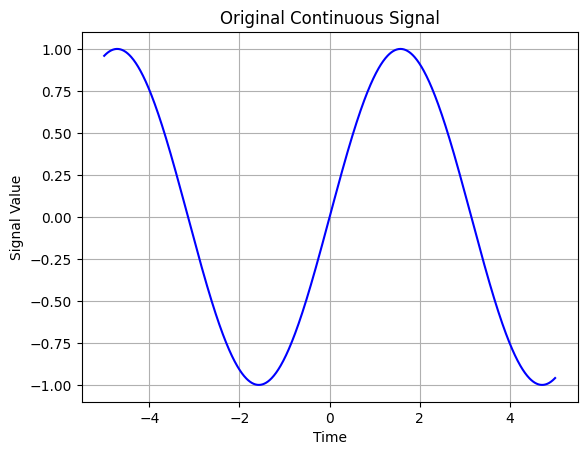

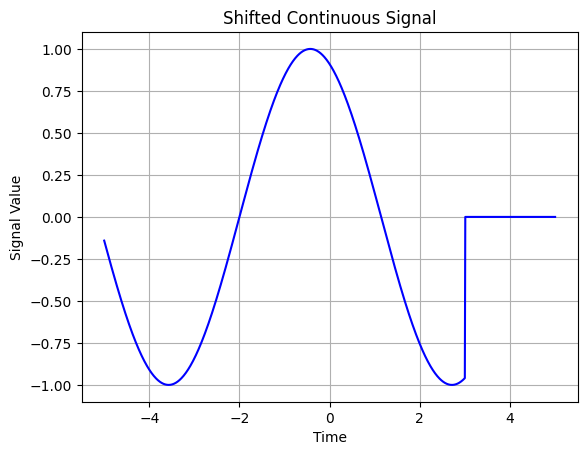

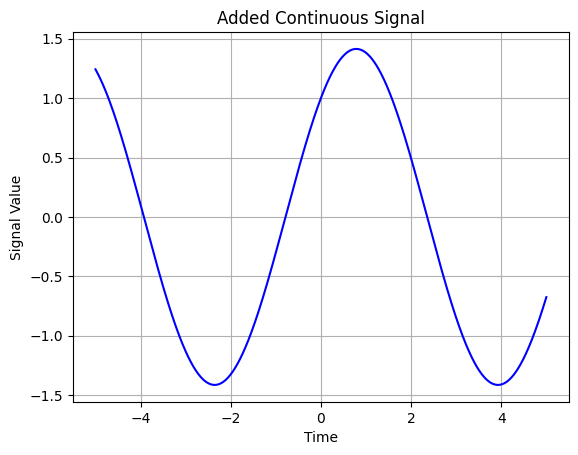

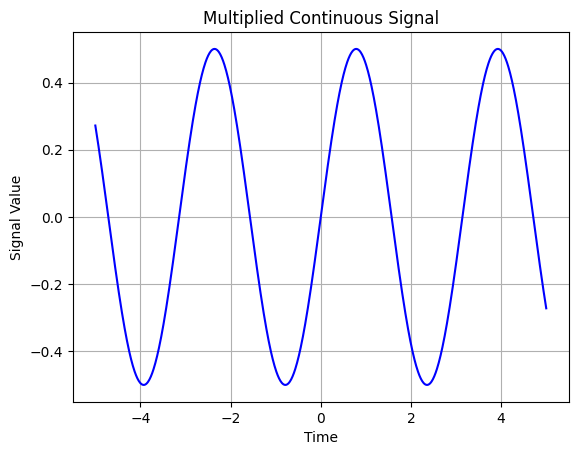

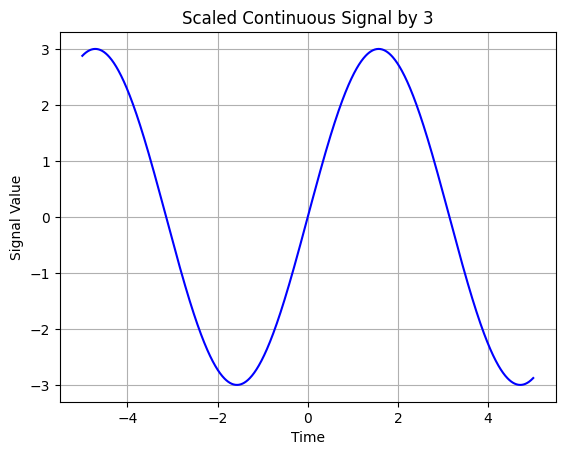

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousSignal:
    def __init__(self, time_start, time_end, num_points=1000):
        """
        Initialize the ContinuousSignal with a time range and a specified number of points.
        :param time_start: The starting time of the signal.
        :param time_end: The ending time of the signal.
        :param num_points: The number of points to represent the signal (default is 1000).
        """
        self.time_start = time_start
        self.time_end = time_end
        self.num_points = num_points
        self.time_values = np.linspace(time_start, time_end, num_points)  # Generate continuous time values
        self.values = np.zeros(num_points)  # Initialize signal values

    def set_value_at_time(self, func):
        """
        Set the signal values using a provided function of time.
        :param func: A function that takes a time value and returns the signal value.
        """
        self.values = func(self.time_values)

    def shift_signal(self, shift):
        """
        Shift the signal by the specified amount in time and return a new ContinuousSignal object.
        :param shift: The amount to shift the signal in time.
        :return: A new ContinuousSignal instance with the shifted signal.
        """
        shifted_signal = ContinuousSignal(self.time_start, self.time_end, self.num_points)
        shifted_signal.values = np.interp(self.time_values, self.time_values - shift, self.values, left=0, right=0)
        return shifted_signal

    def add(self, other):
        """
        Add another ContinuousSignal to the current signal.
        :param other: The ContinuousSignal instance to add.
        :return: A new ContinuousSignal instance representing the sum.
        """
        if self.time_start != other.time_start or self.time_end != other.time_end or self.num_points != other.num_points:
            raise ValueError("Both signals must have the same time range and number of points")
        added_signal = ContinuousSignal(self.time_start, self.time_end, self.num_points)
        added_signal.values = self.values + other.values
        return added_signal

    def multiply(self, other):
        """
        Perform element-wise multiplication with another ContinuousSignal.
        :param other: The ContinuousSignal instance to multiply with.
        :return: A new ContinuousSignal instance representing the element-wise product.
        """
        if self.time_start != other.time_start or self.time_end != other.time_end or self.num_points != other.num_points:
            raise ValueError("Both signals must have the same time range and number of points")
        multiplied_signal = ContinuousSignal(self.time_start, self.time_end, self.num_points)
        multiplied_signal.values = self.values * other.values
        return multiplied_signal

    def multiply_const_factor(self, factor):
        """
        Multiply the signal by a constant factor.
        :param factor: The scalar factor to multiply the signal with.
        :return: A new ContinuousSignal instance multiplied by the factor.
        """
        scaled_signal = ContinuousSignal(self.time_start, self.time_end, self.num_points)
        scaled_signal.values = self.values * factor
        return scaled_signal

    def plot(self, title="Continuous Signal", color='blue'):
        """
        Plot the signal values against the continuous time values.
        :param title: The title of the plot.
        :param color: The color of the plot.
        """
        plt.plot(self.time_values, self.values, color=color)
        plt.title(title)
        plt.xlabel("Time")
        plt.ylabel("Signal Value")
        plt.grid()
        plt.show()


# Example Usage:
if __name__ == "__main__":
    time_start = -5
    time_end = 5
    num_points = 1000  # Define the number of points to represent the signal

    # Create a continuous signal with a sine wave function
    signal1 = ContinuousSignal(time_start, time_end, num_points)
    signal1.set_value_at_time(lambda t: np.sin(t))

    # Plot the original signal
    signal1.plot(title="Original Continuous Signal")

    # Shift the signal by 2 units
    shifted_signal = signal1.shift_signal(2)
    shifted_signal.plot(title="Shifted Continuous Signal")

    # Create another signal with a cosine wave
    signal2 = ContinuousSignal(time_start, time_end, num_points)
    signal2.set_value_at_time(lambda t: np.cos(t))

    # Add two signals
    added_signal = signal1.add(signal2)
    added_signal.plot(title="Added Continuous Signal")

    # Multiply two signals element-wise
    multiplied_signal = signal1.multiply(signal2)
    multiplied_signal.plot(title="Multiplied Continuous Signal")

    # Multiply by a constant
    scaled_signal = signal1.multiply_const_factor(3)
    scaled_signal.plot(title="Scaled Continuous Signal by 3")
